In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
X_train_orig = np.array(train_dataset["train_set_x"])
y_train_orig = np.array(train_dataset["train_set_y"])
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
X_test_orig = np.array(test_dataset["test_set_x"])
y_test_orig = np.array(test_dataset["test_set_y"])
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1).T
y_train = y_train_orig.reshape(1,-1)
y_test = y_test_orig.reshape(1,-1)

[X_train.shape, y_train.shape, X_test.shape, y_test.shape]

[(12288, 209), (1, 209), (12288, 50), (1, 50)]

In [6]:
X_train = X_train / 255
X_test = X_test / 255

## processing:
- forward step, calculating the cost function L(a,y):
    - $z^{(i)} = wx + b$
    - $\hat{y}^{(i)} = a^{(i)} = \sigma{(z)^{(i)}}$
    - $L(a^{(i)}, y^{(i)}) = -y^{(i)}log a^{(i)} - (1-y^{(i)})log(1-a^{(i)})$
    - we need to know the mean of the L function: $\frac{1}{m} \sum{L}$
    
- backward step, calculating the slope of the w, and b:
    - $dz = A - Y$
    - $dw = \frac{1}{m} X(dz)^T$
    - $db = \frac{1}{m} \sum(dz)$
    
- gradiant descent, update the w, b
    - $w = w - \eta {dw}$
    - $b = b - \eta {db}$

Note: the supscript i such as $z^{(i)}$ means the i-th z value of the observation

## dimensions
- X: $(n_x, m)$
- w: $(n_x, 1)$ and $w^T is: (1, n_x)$
- Y: $(1, m)$
- A: $(1, m)$
- dw: $(n_x, m)(m,1) = (n_x, 1)$
- db: this is a constant

In [7]:
def sigmoid(z):
    return ( 1 / (1 + np.exp(-z)) )

In [8]:
def generater(dim):
    w = np.zeros(shape=(dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, int) or isinstance(b, float))
    return (w,b)

In [52]:
def neuron(w, b, X, Y):
    m = X_train.shape[1]
    z = w.T @ X + b
    A = sigmoid(z)
    cost = (-1 / m) * np.sum( Y * np.log(A) + (1 - Y) * (np.log(1-A)) )
    dw = (1/m) * (X @ (A-Y).T)
    db = (1/m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(isinstance(b, float) or isinstance(b, int))
    cost = np.squeeze(cost)
    
    grads = {
        "dw":dw,
        "db":db
    }
    return (grads, cost)

In [58]:
def gradiantDesc(w,b,X,Y, iteration_times, eta):
    costs = []
    
    for i in range(iteration_times):
        grads, cost = neuron(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - eta*dw
        b = b - eta*db
        
        if (i % 100 == 0):
            costs.append(cost)
            print('{}-th iteration:'.format(i), 'cost=', cost)
    params = {
        "w":w,
        "b":b
    }
    grads = {
        "dw":dw,
        "db": db
    }
    return (params, grads, costs)

In [38]:
def prediction(w,b,X):
    m = X.shape[1]
    w = w.reshape(-1, 1)
    assert(w.shape == (X.shape[0],1))
    A = sigmoid(w.T @ X + b)
    y_pred = A.copy()
    y_pred[A > 0.5] = 1
    y_pred[A <= 0.5] = 0
    assert(y_pred.shape== (1,m))
    return y_pred

In [61]:
def model(X_train, y_train,X_test, y_test, iteration_time=2000, eta = 0.1):
    w, b = generater(X_train.shape[0])
    params, grads, costs = gradiantDesc(w, b, X_train, y_train, iteration_time, eta)
    w, b = params['w'], params['b']
    y_pred = prediction(w,b,X_test)
    accuracy = np.sum(y_pred == y_test) / (y_test.shape[1])
    print("the accuracy of the prediction is:", accuracy)
    return costs

In [62]:
costs= model(X_train, y_train, X_test, y_test, eta=0.005)

0-th iteration: cost= 0.6931471805599453
100-th iteration: cost= 0.5845083636993085
200-th iteration: cost= 0.4669490409465547
300-th iteration: cost= 0.37600686694802077
400-th iteration: cost= 0.3314632893282512
500-th iteration: cost= 0.303273067474383
600-th iteration: cost= 0.27987958658260487
700-th iteration: cost= 0.2600421369258757
800-th iteration: cost= 0.2429406846779662
900-th iteration: cost= 0.22800422256726066
1000-th iteration: cost= 0.2148195137844964
1100-th iteration: cost= 0.20307819060644985
1200-th iteration: cost= 0.1925442771670686
1300-th iteration: cost= 0.18303333796883509
1400-th iteration: cost= 0.17439859438448876
1500-th iteration: cost= 0.16652139705400335
1600-th iteration: cost= 0.15930451829756614
1700-th iteration: cost= 0.152667324712965
1800-th iteration: cost= 0.1465422350398234
1900-th iteration: cost= 0.14087207570310162
the accuracy of the prediction is: 0.7


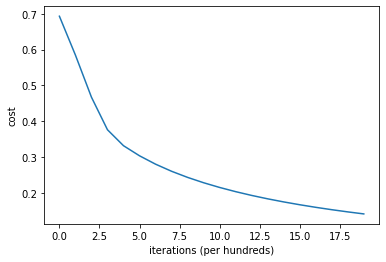

In [65]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.show()